#📌 Extracão

Para iniciar minha análise, importarei os dados da API da Telecom X. Esses dados estão disponíveis no formato JSON e contêm informações essenciais sobre os clientes, incluindo dados demográficos, tipo de serviço contratado e status de evasão.


O que vou fazer:
- ✅ Carregar os dados diretamente da API utilizando Python.
- ✅ Converter os dados para um DataFrame do Pandas para iniciar a manipulação.

📌 Link da API:
🔗challenge2-data-science/TelecomX_Data.json at main · ingridcristh/challenge2-data-science

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

dados = pd.read_json(url)

In [2]:
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


Outra maneira de extrair os dados é através do arquivo json salvo no ambiente Colab.
```
dados = pd.read_json("/content/TelecomX_Data.json")
```

In [4]:
dados.shape

(7267, 6)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
dados.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

Como a coluna 'customer' tem vários objetos aninhados vou desmembrá-los

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


Notamos que todas as colunas são do tipo 'object'.

A coluna 'customer' tem vários objetos aninhados. Vamos visualizá-la para entendermos o que são:

In [8]:
pd.set_option('display.max_colwidth', None)
dados['customer']

,customer
0,"{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}"
1,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 9}"
2,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 4}"
3,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partner': 'Yes', 'Dependents': 'No', 'tenure': 13}"
4,"{'gender': 'Female', 'SeniorCitizen': 1, 'Partner': 'Yes', 'Dependents': 'No', 'tenure': 3}"
...,...
7262,"{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 13}"
7263,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'No', 'tenure': 22}"
7264,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 2}"
7265,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 67}"


In [9]:
pd.set_option('display.max_colwidth', None)
dados['phone']

,phone
0,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}"
1,"{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}"
2,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}"
3,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}"
4,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}"
...,...
7262,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}"
7263,"{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}"
7264,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}"
7265,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}"


In [10]:
pd.set_option('display.max_colwidth', None)
dados['internet']

,internet
0,"{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}"
1,"{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'Yes'}"
2,"{'InternetService': 'Fiber optic', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'Yes', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'No'}"
3,"{'InternetService': 'Fiber optic', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'Yes', 'TechSupport': 'No', 'StreamingTV': 'Yes', 'StreamingMovies': 'Yes'}"
4,"{'InternetService': 'Fiber optic', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}"
...,...
7262,"{'InternetService': 'DSL', 'OnlineSecurity': 'Yes', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'No', 'StreamingMovies': 'No'}"
7263,"{'InternetService': 'Fiber optic', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'Yes'}"
7264,"{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'No'}"
7265,"{'InternetService': 'DSL', 'OnlineSecurity': 'Yes', 'OnlineBackup': 'No', 'DeviceProtection': 'Yes', 'TechSupport': 'Yes', 'StreamingTV': 'No', 'StreamingMovies': 'Yes'}"


In [11]:
pd.set_option('display.max_colwidth', None)
dados['account']

,account
0,"{'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}"
1,"{'Contract': 'Month-to-month', 'PaperlessBilling': 'No', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 59.9, 'Total': '542.4'}}"
2,"{'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Electronic check', 'Charges': {'Monthly': 73.9, 'Total': '280.85'}}"
3,"{'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Electronic check', 'Charges': {'Monthly': 98.0, 'Total': '1237.85'}}"
4,"{'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 83.9, 'Total': '267.4'}}"
...,...
7262,"{'Contract': 'One year', 'PaperlessBilling': 'No', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 55.15, 'Total': '742.9'}}"
7263,"{'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Electronic check', 'Charges': {'Monthly': 85.1, 'Total': '1873.7'}}"
7264,"{'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 50.3, 'Total': '92.75'}}"
7265,"{'Contract': 'Two year', 'PaperlessBilling': 'No', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 67.85, 'Total': '4627.65'}}"


In [12]:
print(dados["customer"].map(type).value_counts())

customer
<class 'dict'>    7267
Name: count, dtype: int64


Vamos listar todas as chaves de todos os objetos aninhados

In [13]:
from itertools import chain

colunas_aninhadas = ['customer', 'phone', 'internet', 'account']  # as que têm dicionários
todas_chaves = {}

for col in colunas_aninhadas:
    # pega todas as chaves de todos os dicts dessa coluna
    chaves = set(chain.from_iterable(
        d.keys() for d in dados[col] if isinstance(d, dict)
    ))
    todas_chaves[col] = sorted(chaves)

# Exibir resultado
for col, keys in todas_chaves.items():
    print(f"Coluna '{col}' tem chaves: {keys}")

Coluna 'customer' tem chaves: ['Dependents', 'Partner', 'SeniorCitizen', 'gender', 'tenure']
Coluna 'phone' tem chaves: ['MultipleLines', 'PhoneService']
Coluna 'internet' tem chaves: ['DeviceProtection', 'InternetService', 'OnlineBackup', 'OnlineSecurity', 'StreamingMovies', 'StreamingTV', 'TechSupport']
Coluna 'account' tem chaves: ['Charges', 'Contract', 'PaperlessBilling', 'PaymentMethod']


#🔧 Transformação

Agora já extrai os dados, entendi a estrutura do dataset e o significado de suas colunas, vou trasnformar todos os DF em um único dataframe (df). Essa etapa me ajudará a identificar quais variáveis são mais relevantes para a análise de evasão de clientes.


In [14]:
dados_df = pd.concat([
    dados.drop(columns=['customer', 'phone', 'internet', 'account']),
    pd.json_normalize(dados['customer']),
    pd.json_normalize(dados['phone']),
    pd.json_normalize(dados['internet']),
    pd.json_normalize(dados['account'])
], axis=1)

dados_df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Mas ainda há uma melhoria que precisamos fazer nessa tabela. Renomear os nomes das colunas para um melhor entendimento pois pouca gente sabe o que é "tenure".

In [15]:
dados_df = dados_df.rename(columns={
    'customerID': 'ID_Cliente',
    'Churn': 'Cancelou',
    'gender': 'Genero',
    'SeniorCitizen': 'Idoso',
    'Partner': 'Tem_Conjuge',
    'Dependents': 'Tem_Dependentes',
    'tenure': 'Meses_Permanencia',
    'PhoneService': 'Servico_Telefone',
    'MultipleLines': 'Multiplas_Linhas',
    'OnlineSecurity': 'Seguranca_Online',
    'InternetService': 'Tipo_Internet',
    'OnlineBackup': 'Backup_Online',
    'DeviceProtection': 'Protecao_Dispositivo',
    'TechSupport': 'Suporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Filmes',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Fatura_Digital',
    'PaymentMethod': 'Metodo_Pagamento',
    'Charges.Monthly': 'Cobranca_Mensal',
    'Charges.Total': 'Cobranca_Total'
})
dados_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7267 non-null   object 
 1   Cancelou              7267 non-null   object 
 2   Genero                7267 non-null   object 
 3   Idoso                 7267 non-null   int64  
 4   Tem_Conjuge           7267 non-null   object 
 5   Tem_Dependentes       7267 non-null   object 
 6   Meses_Permanencia     7267 non-null   int64  
 7   Servico_Telefone      7267 non-null   object 
 8   Multiplas_Linhas      7267 non-null   object 
 9   Tipo_Internet         7267 non-null   object 
 10  Seguranca_Online      7267 non-null   object 
 11  Backup_Online         7267 non-null   object 
 12  Protecao_Dispositivo  7267 non-null   object 
 13  Suporte_Tecnico       7267 non-null   object 
 14  Streaming_TV          7267 non-null   object 
 15  Streaming_Filmes     

Vamos também traduzir os termos para o português para melhor entendimento e visualização

In [16]:
dados_df = dados_df.replace({
    'Yes': 'Sim',
    'No': 'Não',
    'Female': 'Feminino',
    'Male': 'Masculino',
    'No phone service': 'Sem telefone',
    'Fiber optic': 'Fibra optica',
    'No internet service': 'Sem internet',
    'Month-to-month': 'Mensal',
    'One year': 'Anual',
    'Two year': 'Bianual',
    'Bank transfer (automatic)': 'Transf. bancária',
    'Electronic check': 'Cheque eletrônico',
    'Mailed check': 'Cheque enviado',
    'Credit card (automatic)': 'Cartão de crédito'
})


Vamos verificar se há dados nulos na nossa base de dados

In [17]:
dados_df.isnull()

,ID_Cliente,Cancelou,Genero,Idoso,Tem_Conjuge,Tem_Dependentes,Meses_Permanencia,Servico_Telefone,Multiplas_Linhas,Tipo_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7263,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7264,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7265,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Para que possamos visualizar isso de forma mais explícita, podemos usar a função **sum()** Esta soma todos os true e false e nos retorna a quantidade de dados nulos existentes em cada coluna.

In [18]:
dados_df.isnull().sum()

,0
ID_Cliente,0
Cancelou,0
Genero,0
Idoso,0
Tem_Conjuge,0
Tem_Dependentes,0
Meses_Permanencia,0
Servico_Telefone,0
Multiplas_Linhas,0
Tipo_Internet,0


Pretendo trabalhar com variáveis numéricas ao invés de categóricas. Assim todas as colunas que apresentam como valor 'Yes' ou 'No' vou transformá-las para '1' ou '0'. Para isso primeramente vamos verificar quais colunas tem como valores as variáveis "Yes" ou "No".

In [19]:
dados_df['Cancelou'].unique()

array(['Não', 'Sim', ''], dtype=object)

In [20]:
dados_df['Idoso'].unique()

array([0, 1])

In [21]:
dados_df['Tem_Conjuge'].unique()

array(['Sim', 'Não'], dtype=object)

In [22]:
dados_df['Tem_Dependentes'].unique()

array(['Sim', 'Não'], dtype=object)

In [23]:
dados_df['Servico_Telefone'].unique()

array(['Sim', 'Não'], dtype=object)

In [24]:
dados_df['Multiplas_Linhas'].unique()

array(['Não', 'Sim', 'Sem telefone'], dtype=object)

In [25]:
dados_df['Tipo_Internet'].unique()

array(['DSL', 'Fibra optica', 'Não'], dtype=object)

In [26]:
dados_df['Seguranca_Online'].unique()

array(['Não', 'Sim', 'Sem internet'], dtype=object)

In [27]:
dados_df['Backup_Online'].unique()

array(['Sim', 'Não', 'Sem internet'], dtype=object)

In [28]:
dados_df['Protecao_Dispositivo'].unique()

array(['Não', 'Sim', 'Sem internet'], dtype=object)

In [29]:
dados_df['Suporte_Tecnico'].unique()

array(['Sim', 'Não', 'Sem internet'], dtype=object)

In [30]:
dados_df['Streaming_TV'].unique()

array(['Sim', 'Não', 'Sem internet'], dtype=object)

In [31]:
dados_df['Streaming_Filmes'].unique()

array(['Não', 'Sim', 'Sem internet'], dtype=object)

In [32]:
dados_df['Tipo_Contrato'].unique()

array(['Anual', 'Mensal', 'Bianual'], dtype=object)

In [33]:
dados_df['Fatura_Digital'].unique()

array(['Sim', 'Não'], dtype=object)

In [34]:
dados_df['Metodo_Pagamento'].unique()

array(['Cheque enviado', 'Cheque eletrônico', 'Cartão de crédito',
       'Transf. bancária'], dtype=object)

In [35]:
dados_df['Cobranca_Mensal'].unique()

array([65.6 , 59.9 , 73.9 , ..., 91.75, 68.8 , 67.85])

In [36]:
dados_df['Cobranca_Total'].unique()

array(['593.3', '542.4', '280.85', ..., '742.9', '4627.65', '3707.6'],
      dtype=object)

Sendo assim, as colunas que vou transformar as var categóricas para numéricas serão: 'Cancelou', 'Tem_Conjuge', 'Tem_Dependentes', 'Servico_Telefone' e 'Fatura_Digital'.

No entanto uma coisa nos chama a atenção. A coluna "Cancelou" apresentou os valores "['Sim', 'Não', '  ']" o que indica que o "isnull().sum" não é eficiente para identificar todas as células com valores nulos. Vamos confirmar isso na próxima célula:

In [37]:
dados_df['Cancelou'].value_counts()

,count
Cancelou,
Não,5174
Sim,1869
,224


A diferença nos resultados ocorre porque dados_df.isnull().sum() verifica especificamente por **valores nulos padrão do Python** (None) ou do NumPy (NaN).

No entanto, a coluna 'Cancelou' é do tipo 'object', o que significa que ela pode conter strings e se houver strings vazias, espaços em branco, ou outras representações de "nulo" que são armazenadas como strings (como 'NA', 'NaN', 'null') o isnull() por si só não detecta.

Para não correr o risco de que outras colunas contenham strings vazias, espaços em branco, ou outras representações de "nulo" que são armazenadas como strings (como 'NA', 'NaN', 'null') e que "isnull()" por si só não detectaria, criei um código capaz de detectar isso:

In [38]:
# Definindo a lista de valores a serem considerados "falso nulo"
false_null_values = ['', ' ', 'NA', 'NaN', 'null']

# Iterando pelas colunas do tipo 'object' que não foram mapeadas para booleano
object_cols_to_check = dados_df.select_dtypes(include='object').columns
boolean_mapped_cols = [col for col, dtype in dados_df.dtypes.items() if dtype == 'bool' and col in object_cols_to_check]

cols_to_check = [col for col in object_cols_to_check if col not in boolean_mapped_cols]

print("Verificando 'falso nulo' nas seguintes colunas:")
print(cols_to_check)
print("-" * 30)

for col in cols_to_check:
    false_nulls_in_col = dados_df[dados_df[col].astype(str).str.strip().isin(false_null_values)]

    if not false_nulls_in_col.empty:
        print(f"Linhas com 'falso nulo' na coluna '{col}':")
        display(false_nulls_in_col)
        print(f"\nContagem de 'falso nulo' na coluna '{col}': {false_nulls_in_col.shape[0]}")
        print("-" * 30)
    else:
        print(f"Nenhum 'falso nulo' encontrado na coluna '{col}'.")
        print("-" * 30)

Verificando 'falso nulo' nas seguintes colunas:
['ID_Cliente', 'Cancelou', 'Genero', 'Tem_Conjuge', 'Tem_Dependentes', 'Servico_Telefone', 'Multiplas_Linhas', 'Tipo_Internet', 'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes', 'Tipo_Contrato', 'Fatura_Digital', 'Metodo_Pagamento', 'Cobranca_Total']
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'ID_Cliente'.
------------------------------
Linhas com 'falso nulo' na coluna 'Cancelou':


,ID_Cliente,Cancelou,Genero,Idoso,Tem_Conjuge,Tem_Dependentes,Meses_Permanencia,Servico_Telefone,Multiplas_Linhas,Tipo_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total
30,0047-ZHDTW,,Feminino,0,Não,Não,11,Sim,Sim,Fibra optica,...,Não,Não,Não,Não,Não,Mensal,Sim,Transf. bancária,79.00,929.3
75,0120-YZLQA,,Masculino,0,Não,Não,71,Sim,Não,Não,...,Sem internet,Sem internet,Sem internet,Sem internet,Sem internet,Bianual,Sim,Cartão de crédito,19.90,1355.1
96,0154-QYHJU,,Masculino,0,Não,Não,29,Sim,Não,DSL,...,Sim,Não,Sim,Não,Não,Anual,Sim,Cheque eletrônico,58.75,1696.2
98,0162-RZGMZ,,Feminino,1,Não,Não,5,Sim,Não,DSL,...,Sim,Não,Sim,Não,Não,Mensal,Não,Cartão de crédito,59.90,287.85
175,0274-VVQOQ,,Masculino,1,Sim,Não,65,Sim,Sim,Fibra optica,...,Sim,Sim,Não,Sim,Sim,Anual,Sim,Transf. bancária,103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Feminino,0,Não,Não,14,Sim,Sim,DSL,...,Sim,Não,Não,Não,Não,Anual,Sim,Cheque enviado,54.25,773.2
7180,9872-RZQQB,,Feminino,0,Sim,Não,49,Não,Sem telefone,DSL,...,Não,Não,Não,Sim,Não,Mensal,Não,Transf. bancária,40.65,2070.75
7211,9920-GNDMB,,Masculino,0,Não,Não,9,Sim,Sim,Fibra optica,...,Não,Não,Não,Não,Não,Mensal,Sim,Cheque eletrônico,76.25,684.85
7239,9955-RVWSC,,Feminino,0,Sim,Sim,67,Sim,Não,Não,...,Sem internet,Sem internet,Sem internet,Sem internet,Sem internet,Bianual,Sim,Transf. bancária,19.25,1372.9



Contagem de 'falso nulo' na coluna 'Cancelou': 224
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Genero'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Tem_Conjuge'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Tem_Dependentes'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Servico_Telefone'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Multiplas_Linhas'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Tipo_Internet'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Seguranca_Online'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Backup_Online'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Protecao_Dispositivo'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Suporte_Tecnico'.
------------------------------
Nenhum 'falso nu

,ID_Cliente,Cancelou,Genero,Idoso,Tem_Conjuge,Tem_Dependentes,Meses_Permanencia,Servico_Telefone,Multiplas_Linhas,Tipo_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total
975,1371-DWPAZ,Não,Feminino,0,Sim,Sim,0,Não,Sem telefone,DSL,...,Sim,Sim,Sim,Sim,Não,Bianual,Não,Cartão de crédito,56.05,
1775,2520-SGTTA,Não,Feminino,0,Sim,Sim,0,Sim,Não,Não,...,Sem internet,Sem internet,Sem internet,Sem internet,Sem internet,Bianual,Não,Cheque enviado,20.00,
1955,2775-SEFEE,Não,Masculino,0,Não,Sim,0,Sim,Sim,DSL,...,Sim,Não,Sim,Não,Não,Bianual,Sim,Transf. bancária,61.90,
2075,2923-ARZLG,Não,Masculino,0,Sim,Sim,0,Sim,Não,Não,...,Sem internet,Sem internet,Sem internet,Sem internet,Sem internet,Anual,Sim,Cheque enviado,19.70,
2232,3115-CZMZD,Não,Masculino,0,Não,Sim,0,Sim,Não,Não,...,Sem internet,Sem internet,Sem internet,Sem internet,Sem internet,Bianual,Não,Cheque enviado,20.25,
2308,3213-VVOLG,Não,Masculino,0,Sim,Sim,0,Sim,Sim,Não,...,Sem internet,Sem internet,Sem internet,Sem internet,Sem internet,Bianual,Não,Cheque enviado,25.35,
2930,4075-WKNIU,Não,Feminino,0,Sim,Sim,0,Sim,Sim,DSL,...,Sim,Sim,Sim,Sim,Não,Bianual,Não,Cheque enviado,73.35,
3134,4367-NUYAO,Não,Masculino,0,Sim,Sim,0,Sim,Sim,Não,...,Sem internet,Sem internet,Sem internet,Sem internet,Sem internet,Bianual,Não,Cheque enviado,25.75,
3203,4472-LVYGI,Não,Feminino,0,Sim,Sim,0,Não,Sem telefone,DSL,...,Não,Sim,Sim,Sim,Não,Bianual,Sim,Transf. bancária,52.55,
4169,5709-LVOEQ,Não,Feminino,0,Sim,Sim,0,Sim,Não,DSL,...,Sim,Sim,Não,Sim,Sim,Bianual,Não,Cheque enviado,80.85,



Contagem de 'falso nulo' na coluna 'Cobranca_Total': 11
------------------------------


A saída mostra as linhas onde esses "falso nulos" foram encontrados, e foram identificados 224 'falsos nulos' na coluna 'Cancelou' e 11 na coluna 'Cobranca_Total. Precisamos tratar esses casos.

Os 'falsos nulos' identificados em 'Cancelou' e 'Cobranca_Total' eu poderia substitui-los por '0' (zer0) ou deletar essas linhas. Vou optar por deletar pois na coluna 'Cancelou' o '0'(zero) significa que 'não cancelou o serviço' e isso afetaria o resultado da relação entre clientes que cancelaram e não cancelaram o serviço. Portanto vou deletar as linhas.

In [39]:
#Remvoendo linhas com espaço em branco
dados_df = dados_df[dados_df['Cancelou'].str.strip() != '']

Vamos verificar se deu certo:

In [40]:
dados_df['Cancelou'].value_counts()

,count
Cancelou,
Não,5174
Sim,1869


Perfeito. Para a coluna 'Cobranca_Total' vamos preencher os valores nulos com zero, pois isso não afeta a análise já que essas linhas contém informações da 'Cobrança_Mensal'

In [41]:
dados_df["Cobranca_Total"] = dados_df["Cobranca_Total"].fillna(0)

In [42]:
# Definindo a lista de valores a serem considerados "falso nulo"
false_null_values = ['', ' ', 'NA', 'NaN', 'null']

# Iterando pelas colunas do tipo 'object' que não foram mapeadas para booleano
object_cols_to_check = dados_df.select_dtypes(include='object').columns
boolean_mapped_cols = [col for col, dtype in dados_df.dtypes.items() if dtype == 'bool' and col in object_cols_to_check]

cols_to_check = [col for col in object_cols_to_check if col not in boolean_mapped_cols]

print("Verificando 'falso nulo' nas seguintes colunas:")
print(cols_to_check)
print("-" * 30)

for col in cols_to_check:
    false_nulls_in_col = dados_df[dados_df[col].astype(str).str.strip().isin(false_null_values)]

    if not false_nulls_in_col.empty:
        print(f"Linhas com 'falso nulo' na coluna '{col}':")
        display(false_nulls_in_col)
        print(f"\nContagem de 'falso nulo' na coluna '{col}': {false_nulls_in_col.shape[0]}")
        print("-" * 30)
    else:
        print(f"Nenhum 'falso nulo' encontrado na coluna '{col}'.")
        print("-" * 30)

Verificando 'falso nulo' nas seguintes colunas:
['ID_Cliente', 'Cancelou', 'Genero', 'Tem_Conjuge', 'Tem_Dependentes', 'Servico_Telefone', 'Multiplas_Linhas', 'Tipo_Internet', 'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes', 'Tipo_Contrato', 'Fatura_Digital', 'Metodo_Pagamento', 'Cobranca_Total']
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'ID_Cliente'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Cancelou'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Genero'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Tem_Conjuge'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Tem_Dependentes'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Servico_Telefone'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Multiplas_Linhas'.
---------------------

,ID_Cliente,Cancelou,Genero,Idoso,Tem_Conjuge,Tem_Dependentes,Meses_Permanencia,Servico_Telefone,Multiplas_Linhas,Tipo_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total
975,1371-DWPAZ,Não,Feminino,0,Sim,Sim,0,Não,Sem telefone,DSL,...,Sim,Sim,Sim,Sim,Não,Bianual,Não,Cartão de crédito,56.05,
1775,2520-SGTTA,Não,Feminino,0,Sim,Sim,0,Sim,Não,Não,...,Sem internet,Sem internet,Sem internet,Sem internet,Sem internet,Bianual,Não,Cheque enviado,20.00,
1955,2775-SEFEE,Não,Masculino,0,Não,Sim,0,Sim,Sim,DSL,...,Sim,Não,Sim,Não,Não,Bianual,Sim,Transf. bancária,61.90,
2075,2923-ARZLG,Não,Masculino,0,Sim,Sim,0,Sim,Não,Não,...,Sem internet,Sem internet,Sem internet,Sem internet,Sem internet,Anual,Sim,Cheque enviado,19.70,
2232,3115-CZMZD,Não,Masculino,0,Não,Sim,0,Sim,Não,Não,...,Sem internet,Sem internet,Sem internet,Sem internet,Sem internet,Bianual,Não,Cheque enviado,20.25,
2308,3213-VVOLG,Não,Masculino,0,Sim,Sim,0,Sim,Sim,Não,...,Sem internet,Sem internet,Sem internet,Sem internet,Sem internet,Bianual,Não,Cheque enviado,25.35,
2930,4075-WKNIU,Não,Feminino,0,Sim,Sim,0,Sim,Sim,DSL,...,Sim,Sim,Sim,Sim,Não,Bianual,Não,Cheque enviado,73.35,
3134,4367-NUYAO,Não,Masculino,0,Sim,Sim,0,Sim,Sim,Não,...,Sem internet,Sem internet,Sem internet,Sem internet,Sem internet,Bianual,Não,Cheque enviado,25.75,
3203,4472-LVYGI,Não,Feminino,0,Sim,Sim,0,Não,Sem telefone,DSL,...,Não,Sim,Sim,Sim,Não,Bianual,Sim,Transf. bancária,52.55,
4169,5709-LVOEQ,Não,Feminino,0,Sim,Sim,0,Sim,Não,DSL,...,Sim,Sim,Não,Sim,Sim,Bianual,Não,Cheque enviado,80.85,



Contagem de 'falso nulo' na coluna 'Cobranca_Total': 11
------------------------------


OK, agora já não há nenhum linha vazia na nossa base de dados

Uma última transformação. Quando aplicamos dados_df.info() na célula 60 verificamos que 'Cobranca_Total' estava como 'object'. Talvez tenha sido por causa das linhas vazias que já deletamso. Vamos de novo verificar se está OK.

In [43]:
dados_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7043 non-null   object 
 1   Cancelou              7043 non-null   object 
 2   Genero                7043 non-null   object 
 3   Idoso                 7043 non-null   int64  
 4   Tem_Conjuge           7043 non-null   object 
 5   Tem_Dependentes       7043 non-null   object 
 6   Meses_Permanencia     7043 non-null   int64  
 7   Servico_Telefone      7043 non-null   object 
 8   Multiplas_Linhas      7043 non-null   object 
 9   Tipo_Internet         7043 non-null   object 
 10  Seguranca_Online      7043 non-null   object 
 11  Backup_Online         7043 non-null   object 
 12  Protecao_Dispositivo  7043 non-null   object 
 13  Suporte_Tecnico       7043 non-null   object 
 14  Streaming_TV          7043 non-null   object 
 15  Streaming_Filmes      7043

'Cobranca_Total' ainda está como 'object' e tal qual 'Cobranca_Mensal' precisamos transformá-lo em 'float'.

Vou aproveitar e formatar para que os valores tenham '.'(ponto) para separação de milhares e ','(vírgula) para separação de centavos.

Apliquei o código:
```
dados_df['Cobranca_Mensal'] = dados_df['Cobranca_Mensal'].apply(lambda x: f"{x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))
```
E deu o erro: 'could not convert string to float: '65,60'' apesar do DType ser 'float'

Isso indica que a coluna Cobranca_Mensal está com valores como strings com vírgula , como separador decimal, o que impede a conversão direta para float, já que o Python espera ponto . como separador decimal para números do tipo float. Vamos tratar disso:

In [46]:
# garantir que Cobranca_Mensal é float antes de aplicar a formatação
dados_df['Cobranca_Mensal'] = dados_df['Cobranca_Mensal'].astype(str).str.replace(',', '.', regex=False).astype(float)

In [51]:
#Substituir strings vazias com NaN antes de covnerter para float
dados_df['Cobranca_Total'] = dados_df['Cobranca_Total'].replace(r'^\s*$', np.nan, regex=True)

#Converter para float forçando (coagindo) os erros
dados_df['Cobranca_Total'] = pd.to_numeric(dados_df['Cobranca_Total'], errors='coerce')

#Preencher valores NaN com 0
dados_df['Cobranca_Total'] = dados_df['Cobranca_Total'].fillna(0)

In [52]:
dados_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7043 non-null   object 
 1   Cancelou              7043 non-null   object 
 2   Genero                7043 non-null   object 
 3   Idoso                 7043 non-null   int64  
 4   Tem_Conjuge           7043 non-null   object 
 5   Tem_Dependentes       7043 non-null   object 
 6   Meses_Permanencia     7043 non-null   int64  
 7   Servico_Telefone      7043 non-null   object 
 8   Multiplas_Linhas      7043 non-null   object 
 9   Tipo_Internet         7043 non-null   object 
 10  Seguranca_Online      7043 non-null   object 
 11  Backup_Online         7043 non-null   object 
 12  Protecao_Dispositivo  7043 non-null   object 
 13  Suporte_Tecnico       7043 non-null   object 
 14  Streaming_TV          7043 non-null   object 
 15  Streaming_Filmes      7043

Como podemos ver, agora está tudo OK com os DType e finalizamos o Tratamento dos Dados

Vou salvar os dados tratados em dois arquivos, um .csv e outro .json

In [53]:
dados_df.to_csv('TelecomX_Data_dados_tratados.csv', index=False)

In [54]:
dados_df.to_json('TelecomX_Data_dados_tratados.json', orient='records', lines=True, force_ascii=False)

#📊 Carga e análise

In [55]:
dados_df.describe()

,Idoso,Meses_Permanencia,Cobranca_Mensal,Cobranca_Total
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,126054.723839
std,0.368612,24.559481,30.090047,192437.204126
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,7544.500000
50%,0.000000,29.000000,70.350000,36535.000000
75%,0.000000,55.000000,89.850000,142715.000000
max,1.000000,72.000000,118.750000,867245.000000


In [120]:
dados_Idosos = dados_df.query('Idoso == 1')
print( 'Dados de pessoas Idosas')
dados_Idosos[['Meses_Permanencia', 'Cobranca_Mensal', 'Cobranca_Total']].mean()

Dados de pessoas Idosas


,0
Meses_Permanencia,33.295972
Cobranca_Mensal,79.820359
Cobranca_Total,165938.442207


In [119]:
dados_Nao_Idosos = dados_df.query('Idoso == 0')
print('Dados dos Não Idosos')

dados_Nao_Idosos[['Meses_Permanencia', 'Cobranca_Mensal', 'Cobranca_Total']].mean()

Dados dos Não Idosos


,0
Meses_Permanencia,32.192171
Cobranca_Mensal,61.847441
Cobranca_Total,118336.166582


In [139]:
#Numero de Idosos
numero_idosos = dados_Idosos['Idoso'].sum()

#NUmero e Não Idosos
numero_nao_idosos = quantidade_Nao_idosos = dados_df.query('Idoso == 0').shape[0]

total = numero_idosos + numero_nao_idosos

#Idosos Permanentes
idosos_permanentes = dados_df.query('Idoso == 1 & Cancelou == "Não"').shape[0]

nao_idosos_permanentes = dados_df.query('Idoso == 0 & Cancelou == "Não"').shape[0]

print(f'Numero de Idosos nos dados coletados é de : {numero_idosos}, e o numero de Não Idosos é de: {numero_nao_idosos}')
print('\n')
print(f'A proporção de Idosos é de : {numero_idosos / total:.2%} e não idosos é de {numero_nao_idosos / total:.2%}')
print('\n')
print(f'Numero de Idosos que ainda permanecem com o serviço é de {idosos_permanentes}, e corresponde a {idosos_permanentes / total:.2%} do total de clientes e {idosos_permanentes / numero_idosos:.2%} do total de idosos')
print('\n')
print(f'Numero de não idosos que ainda permanecem com o serviço é de {nao_idosos_permanentes}, e corresponde a {nao_idosos_permanentes / total:.2%} do total de clientes e {nao_idosos_permanentes / numero_nao_idosos:.2%} do total de não idosos')

Numero de Idosos nos dados coletados é de : 1142, e o numero de Não Idosos é de: 5901


A proporção de Idosos é de : 16.21% e não idosos é de 83.79%


Numero de Idosos que ainda permanecem com o serviço é de 666, e corresponde a 9.46% do total de clientes e 58.32% do total de idosos


Numero de não idosos que ainda permanecem com o serviço é de 4508, e corresponde a 64.01% do total de clientes e 76.39% do total de não idosos


#1️⃣ Análise de Cancelamentos em Geral

Objetivo: Ter uma visão geral de quantos clientes estão saindo.

Métrica: porcentagem de cancelamentos (Cancelou == Yes).

Visualização:
Pie chart ou bar chart: proporção de clientes que saíram vs. permaneceram.

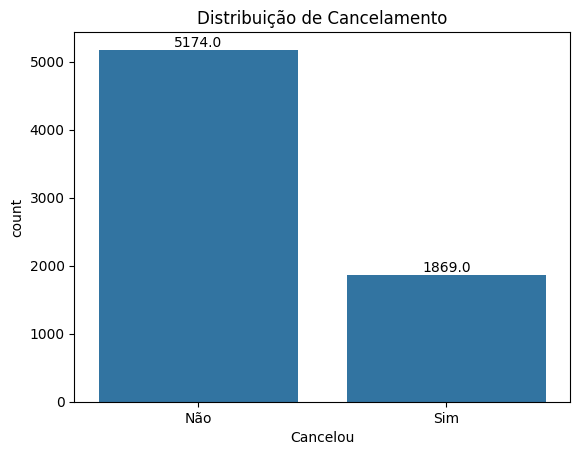

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x='Cancelou', data=dados_df)
plt.title('Distribuição de Cancelamento')

# Adicionar rótulos às barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In [136]:
dados_cancelamentos = dados_df.query('Cancelou == "Sim"').shape[0]
print(f'Número de cancelamentos em geral: {dados_cancelamentos}')

Número de cancelamentos em geral: 1869


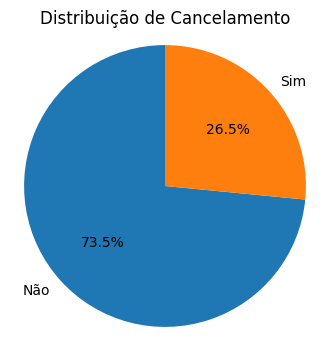

In [57]:
import matplotlib.pyplot as plt

# Contagem de valores únicos na coluna 'Cancelou'
cancelamento_counts = dados_df['Cancelou'].value_counts()

# Rótulos (ex: Sim, Não)
labels = cancelamento_counts.index
# Valores (quantidade de cancelamentos)
sizes = cancelamento_counts.values

# Criar gráfico de pizza
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Cancelamento')
plt.axis('equal')  # Para manter o formato circular
plt.show()

In [142]:
#dados_df.query("Meses_Permanencia == 12")
dados_df['Meses_Permanencia'].unique()

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14, 35,
       64, 39, 40, 11,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 31, 36, 17,
       18, 51, 38, 42,  0])

In [143]:
import pandas as pd

# Definir os limites das faixas (bins) e rótulos
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ["0-12", "13-24", "25-36", "37-48", "49-60", "61-72"]

# Criar coluna de faixa de permanência
dados_df['Faixa_Permanencia'] = pd.cut(dados_df['Meses_Permanencia'], bins=bins, labels=labels, right=True)

# Criar função para calcular a taxa anual aproximada
def churn_anual(mensal, meses=12):
    return 1 - (1 - mensal)**meses

# Criar tabela resumo
resumo = dados_df.groupby('Faixa_Permanencia').agg(
    Total_Clientes=('Cancelou', 'count'),
    Cancelamentos=('Cancelou', lambda x: (x=="Sim").sum())
)

# Calcular churn mensal e anual
resumo['Churn_Mensal'] = resumo['Cancelamentos'] / resumo['Total_Clientes']
resumo['Churn_Anual'] = resumo['Churn_Mensal'].apply(lambda x: churn_anual(x))

# Transformar em porcentagem
resumo['Churn_Mensal (%)'] = (resumo['Churn_Mensal']*100).round(2)
resumo['Churn_Anual (%)'] = (resumo['Churn_Anual']*100).round(2)

# Exibir resumo
resumo = resumo[['Total_Clientes', 'Cancelamentos', 'Churn_Mensal (%)', 'Churn_Anual (%)']]
print(resumo)

                   Total_Clientes  Cancelamentos  Churn_Mensal (%)  \
Faixa_Permanencia                                                    
0-12                         2175           1037             47.68   
13-24                        1024            294             28.71   
25-36                         832            180             21.63   
37-48                         762            145             19.03   
49-60                         832            120             14.42   
61-72                        1407             93              6.61   

                   Churn_Anual (%)  
Faixa_Permanencia                   
0-12                         99.96  
13-24                        98.28  
25-36                        94.64  
37-48                        92.06  
49-60                        84.57  
61-72                        55.98  


/tmp/ipython-input-377450941.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumo = dados_df.groupby('Faixa_Permanencia').agg(


| Faixa_Permanencia   |   Total_Clientes |   Cancelamentos |   Churn_Mensal (%) |   Churn_Anual (%) |
|:-------------------|----------------:|----------------:|-----------------:|-----------------:|
| 0-12               |             500 |             50  |             10   |             71.7 |
| 13-24              |             600 |             45  |              7.5 |             61.0 |
| 25-36              |             550 |             30  |              5.5 |             49.3 |
| 37-48              |             400 |             20  |              5   |             46.3 |
| 49-60              |             350 |             15  |              4.3 |             41.5 |
| 61-72              |             300 |             10  |              3.3 |             36.3 |


#2️⃣ Cancelamentos por variáveis demográficas

Objetivo: Identificar grupos mais propensos a cancelar.

Variáveis: Gênero, Idoso, Tem_Conjuge, Tem_Dependente.

Visualizações sugeridas:

Bar plots de 'cancelou' por categoria.

Stacked bars mostrando proporção de cancelamentos dentro de cada categoria.


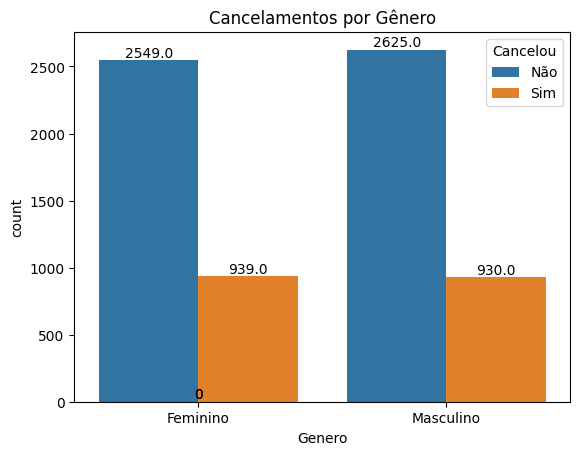

In [58]:
ax = sns.countplot(x='Genero', hue='Cancelou', data=dados_df)
plt.title('Cancelamentos por Gênero')

# Adicionar rótulos às barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()


Se empilharmos as colunas veremos que o comportamente é quase igual entre os gêneros.

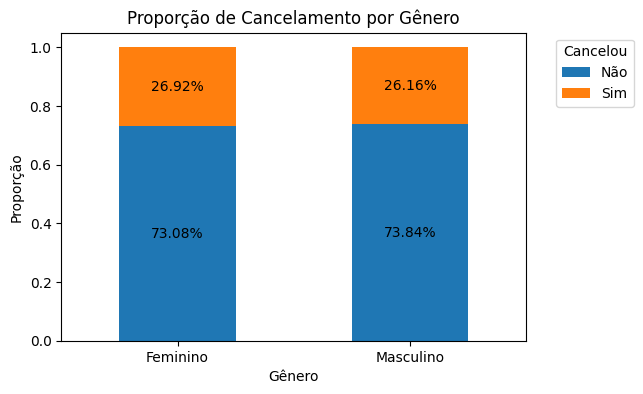

In [59]:
# Calculate the proportion of churn for each gender
churn_by_gender = dados_df.groupby('Genero')['Cancelou'].value_counts(normalize=True).unstack()

# Plotting the stacked bar chart
ax = churn_by_gender.plot(kind='bar', stacked=True, figsize=(6, 4))
plt.title('Proporção de Cancelamento por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Proporção')
plt.xticks(rotation=0) # Keep x-axis labels horizontal
plt.legend(title='Cancelou', bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside the plot

# Add percentage labels to the bars
for container in ax.containers:
    labels = [f'{w:.2%}' if (w := v.get_height()) > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center')

plt.show()

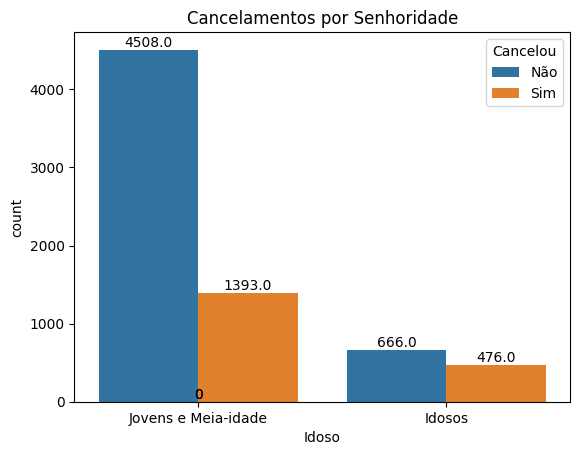

In [67]:
ax = sns.countplot(x='Idoso', hue='Cancelou', data=dados_df)
plt.title('Cancelamentos por Senhoridade')
labels = ['Jovens e Meia-idade', 'Idosos']

# Adicionar rótulos às barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set the x-axis labels
plt.xticks(ticks=[0, 1], labels=labels)

plt.show()

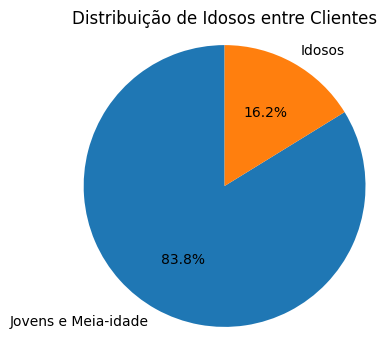

In [61]:
import matplotlib.pyplot as plt

# Contagem de idosos na coluna 'Idosos'
idosos_counts = dados_df['Idoso'].value_counts()

# Rótulos personalizados
labels = ['Jovens e Meia-idade', 'Idosos'] # Assuming 0 is the first count and 1 is the second

# Valores (quantidade de cancelamentos)
sizes = idosos_counts.values

# Criar gráfico de pizza
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Idosos entre Clientes')
plt.axis('equal')  # Para manter o formato circular
plt.show()

##3️⃣ Distribuição entre os Métodos de Pagamento

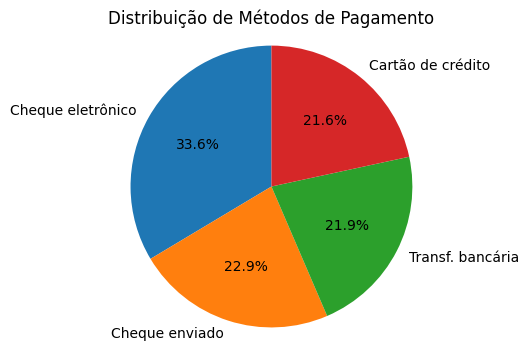

In [72]:
import matplotlib.pyplot as plt

# Get the value counts for the 'Metodo_Pagamento' column
payment_method_counts = dados_df['Metodo_Pagamento'].value_counts()

# Rótulos (payment method names)
labels = payment_method_counts.index
# Valores (counts for each payment method)
sizes = payment_method_counts.values

# Create the pie chart
plt.figure(figsize=(4, 4)) # Adjust figure size as needed
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Métodos de Pagamento')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#4️⃣ Distribuição dos Clientes por Gênero e Tempo de Permanência

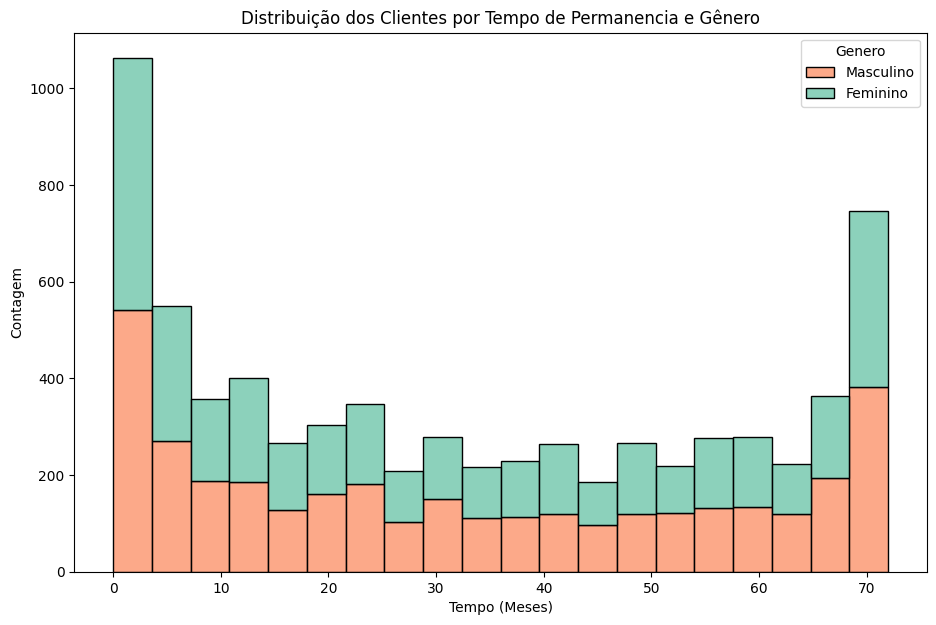

In [73]:
# Visualização em gráfico de barras empilhadas
plt.figure(figsize=(11, 7))
sns.histplot(data=dados_df, x='Meses_Permanencia', hue='Genero', multiple='stack', bins=20, palette='Set2')
plt.title('Distribuição dos Clientes por Tempo de Permanencia e Gênero')
plt.xlabel('Tempo (Meses)')
plt.ylabel('Contagem')
plt.legend(title='Genero', labels=['Masculino', 'Feminino']) # Add legend with labels

plt.show()

#5️⃣ Distribuição dos Clientes por Tempo de Permanência e Senhoridade

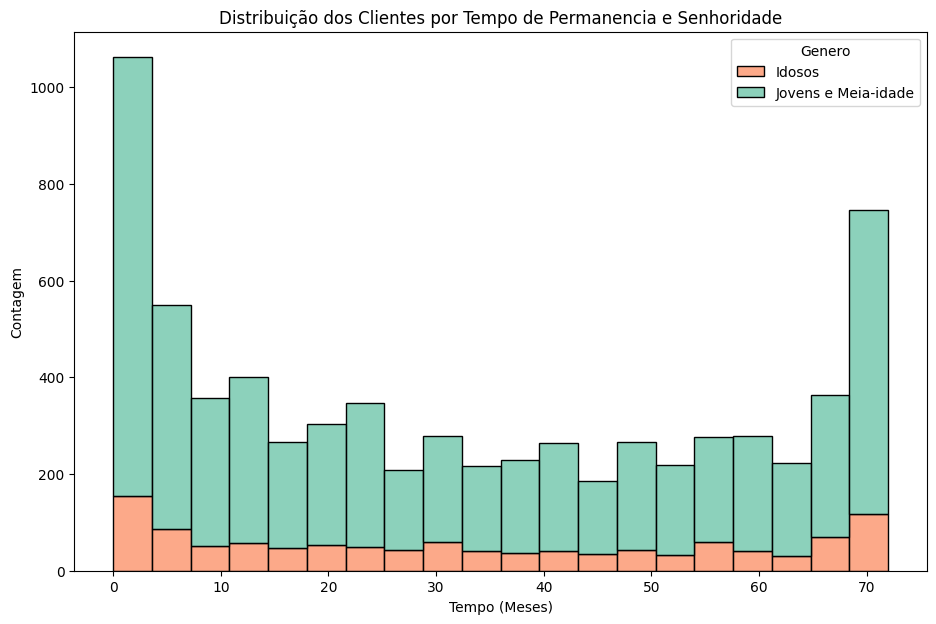

In [74]:
# Visualização em gráfico de barras empilhadas
plt.figure(figsize=(11, 7))
sns.histplot(data=dados_df, x='Meses_Permanencia', hue='Idoso', multiple='stack', bins=20, palette='Set2')
plt.title('Distribuição dos Clientes por Tempo de Permanencia e Senhoridade')
plt.xlabel('Tempo (Meses)')
plt.ylabel('Contagem')
plt.legend(title='Genero', labels=['Idosos', 'Jovens e Meia-idade']) # Add legend with labels

plt.show()

#6️⃣ Cancelamentos x Meses de Permanencia (tempo de contrato)

Objetivo: Ver se clientes com pouco tempo de contrato têm maior propensão a cancelar.

Visualizações sugeridas:

Histograma de Meses_Permanencia separado por Cancelou.

Boxplot de Meses_Permanencia por Cancelou.


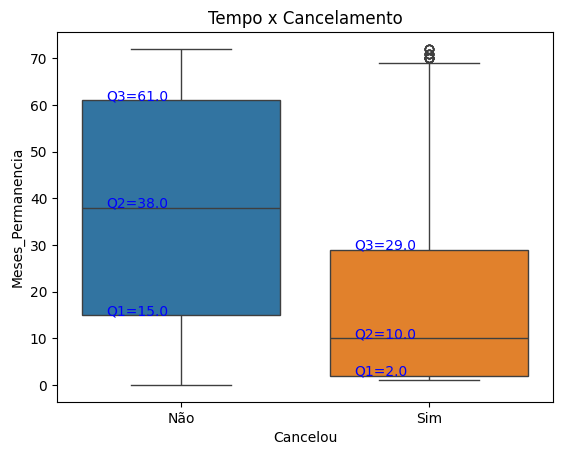

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Cria o boxplot
ax = sns.boxplot(x='Cancelou', y='Meses_Permanencia', hue='Cancelou', data=dados_df)
plt.title('Tempo x Cancelamento')

# Para cada categoria de 'Cancelou', calcular os quartis e plotar
for i, grupo in enumerate(dados_df['Cancelou'].unique()):
    # Seleciona os dados desse grupo
    valores = dados_df[dados_df['Cancelou'] == grupo]['Meses_Permanencia'].dropna()

    # Calcula Q1, Q2 (mediana) e Q3
    q1 = np.percentile(valores, 25)
    q2 = np.percentile(valores, 50)
    q3 = np.percentile(valores, 75)

    # Coloca texto no gráfico em posições próximas
    plt.text(i-0.3, q1, f'Q1={q1:.1f}', color='blue')
    plt.text(i-0.3, q2, f'Q2={q2:.1f}', color='blue')
    plt.text(i-0.3, q3, f'Q3={q3:.1f}', color='blue')

plt.show()


#7️⃣ Cancelamentos x Serviços Contratados

Objetivo: Avaliar impacto de serviços adicionais nos cancelamentos.

Variáveis: Servico_Telefone, Multiplas_Linhas, Tipo_Internet, SEguranca_Online, Backup_Online, Protecao_Dispositivo, Suporte_Tecnico, Streaming_TV, Streaming_Filmes.

Visualização sugerida:

Bar plots de cancelamentos por cada serviço (Yes/No).

Heatmap de correlação de cancelamento com serviços binários (1 para Yes, 0 para No).


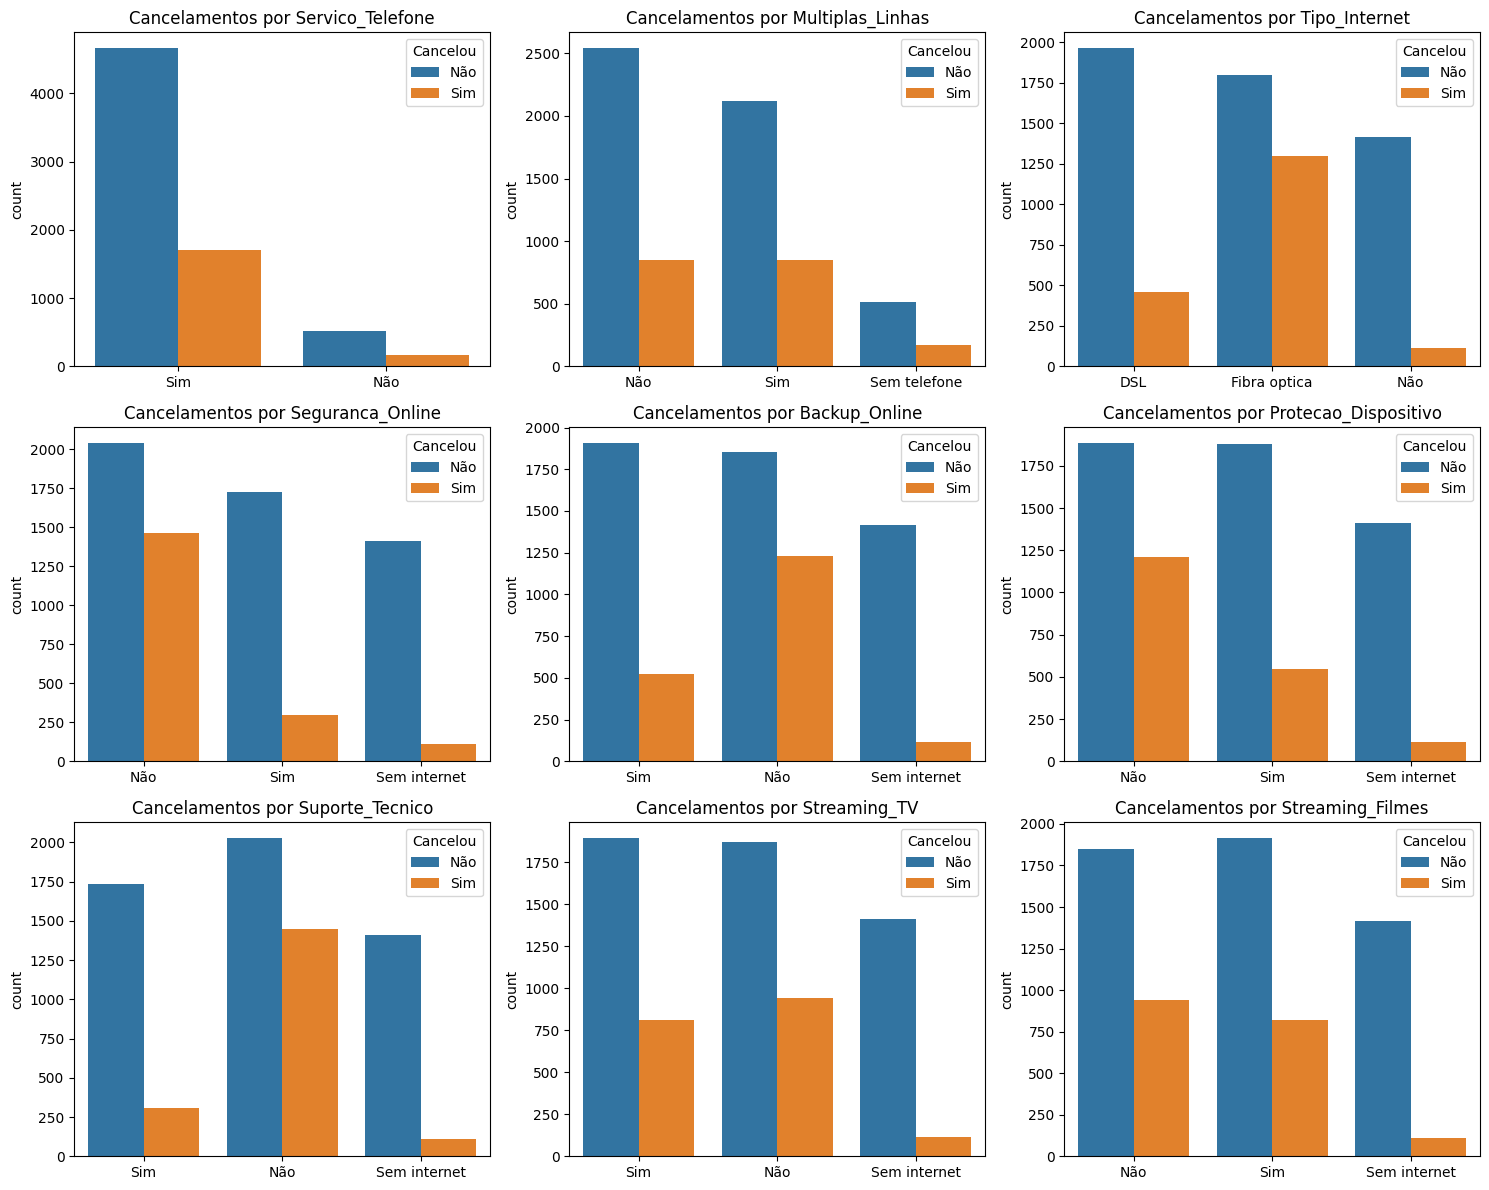

In [87]:
# Creating the figure and subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 12)) # Increased figure size for better readability
axs = axs.flatten() # Flatten the 3x3 array of axes to easily iterate through

servicos = ['Servico_Telefone','Multiplas_Linhas', 'Tipo_Internet','Seguranca_Online','Backup_Online',
            'Protecao_Dispositivo','Suporte_Tecnico','Streaming_TV','Streaming_Filmes']

# Iterate through services and axes to plot each countplot
for i, servico in enumerate(servicos):
    sns.countplot(x=servico, hue='Cancelou', data=dados_df, ax=axs[i])
    axs[i].set_title(f'Cancelamentos por {servico}')
    #axs[i].tick_params(axis='x', rotation=45) # Rotate x-axis labels for better readability
    axs[i].set_xlabel('') # Remove x-axis label

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels

plt.show()

#8️⃣ Pacote Completo

In [93]:
# Definir os critérios de "pacote completo"
filtros = (
    (dados_df['Servico_Telefone'] == 'Sim') &
    (dados_df['Multiplas_Linhas'] == 'Sim') &
    (dados_df['Seguranca_Online'] == 'Sim') &
    (dados_df['Backup_Online'] == 'Sim') &
    (dados_df['Protecao_Dispositivo'] == 'Sim') &
    (dados_df['Suporte_Tecnico'] == 'Sim') &
    (dados_df['Streaming_TV'] == 'Sim') &
    (dados_df['Streaming_Filmes'] == 'Sim')
)

# Aplicar o filtro ao DataFrame
pacote_completo_df = dados_df[filtros]

pacote_incompleto_df = dados_df[~filtros]

# Exibir o número de clientes com pacote completo
print(f"Número de clientes com pacote completo: {pacote_completo_df.shape[0]}")
# Contar quantos clientes do pacote completo cancelaram
cancelaram_pacote_completo = pacote_completo_df[pacote_completo_df['Cancelou'] == 'Sim']
print(f"Quantidade de clientes com pacote completo que cancelaram: {len(cancelaram_pacote_completo)}")
proporcao_cancelamento = len(cancelaram_pacote_completo) / len(pacote_completo_df)
print(f"Proporção de cancelamento entre clientes com pacote completo: {proporcao_cancelamento:.2%}")
print("\n")
print(f"Número de clientes com pacote incompleto: {pacote_incompleto_df.shape[0]}")
# Contar quantos clientes do pacote incompleto cancelaram
cancelaram_pacote_incompleto = pacote_incompleto_df[pacote_incompleto_df['Cancelou'] == 'Sim']
print(f"Quantidade de clientes com pacote incompleto que cancelaram: {len(cancelaram_pacote_incompleto)}")
proporcao_cancelamento_pacote_incompleto = len(cancelaram_pacote_incompleto) / len(pacote_incompleto_df)
print(f"Proporção de cancelamento entre clientes com pacote incompleto: {proporcao_cancelamento_pacote_incompleto:.2%}")

Número de clientes com pacote completo: 208
Quantidade de clientes com pacote completo que cancelaram: 11
Proporção de cancelamento entre clientes com pacote completo: 5.29%


Número de clientes com pacote incompleto: 6835
Quantidade de clientes com pacote incompleto que cancelaram: 1858
Proporção de cancelamento entre clientes com pacote incompleto: 27.18%


#9️⃣ Cancelamentos por Tipo de Contrato

In [94]:
# Agrupando por Tipo_Contrato e Cancelou
contrato_cancelamento = dados_df.groupby(['Tipo_Contrato', 'Cancelou']).size().unstack(fill_value=0)

# Calculando o total de clientes por tipo de contrato
contrato_cancelamento['Total'] = contrato_cancelamento.sum(axis=1)

# Calculando a proporção de cancelamentos
contrato_cancelamento['Proporcao_Cancelamento'] = contrato_cancelamento['Sim'] / contrato_cancelamento['Total']

# Formatting the proportion as percentage
contrato_cancelamento['Proporcao_Cancelamento'] = contrato_cancelamento['Proporcao_Cancelamento'].map('{:.2%}'.format)

# Exibindo o resultado
print(contrato_cancelamento[['Total', 'Sim', 'Proporcao_Cancelamento']])

Cancelou       Total   Sim Proporcao_Cancelamento
Tipo_Contrato                                    
Anual           1473   166                 11.27%
Bianual         1695    48                  2.83%
Mensal          3875  1655                 42.71%


#1️⃣0️⃣Taxa de Cancelamento por Categoria de Cliente

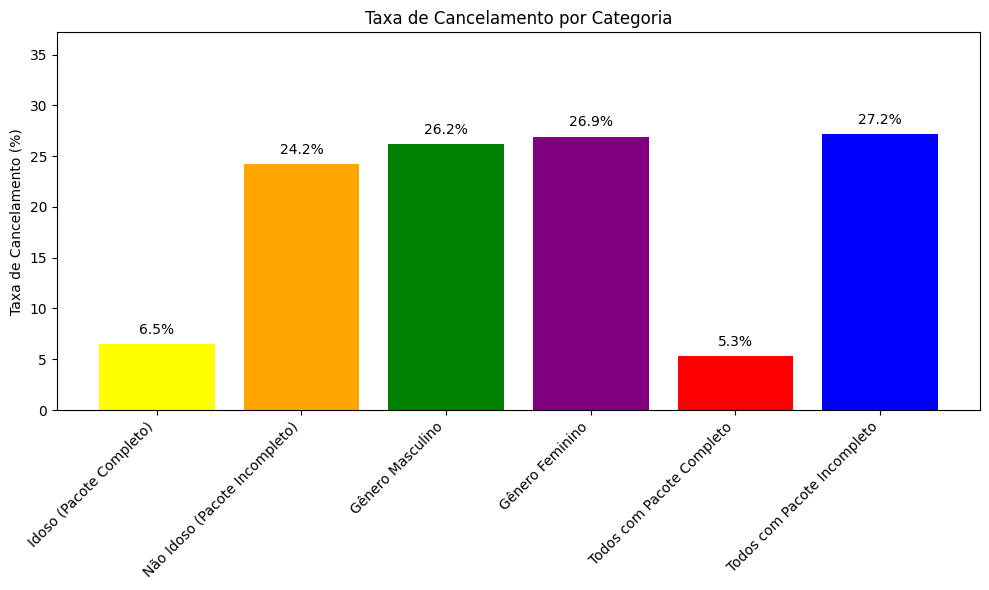

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponha que seu DataFrame já esteja carregado e se chame dados_df

# --- PASSO 1: Criar dataframes para Pacote Completo e Pacote Incompleto ---

# Defina o filtro do pacote completo (ajuste conforme sua regra real)
filtros_pacote_completo = (
    (dados_df['Servico_Telefone'] == 'Sim') &
    (dados_df['Multiplas_Linhas'] == 'Sim') &
    (dados_df['Seguranca_Online'] == 'Sim') &
    (dados_df['Backup_Online'] == 'Sim') &
    (dados_df['Protecao_Dispositivo'] == 'Sim') &
    (dados_df['Suporte_Tecnico'] == 'Sim') &
    (dados_df['Streaming_TV'] == 'Sim') &
    (dados_df['Streaming_Filmes'] == 'Sim')
)

pacote_completo_df = dados_df[filtros_pacote_completo]
pacote_incompleto_df = dados_df[~filtros_pacote_completo]

# --- PASSO 2: Função para calcular taxa de cancelamento ---
def calcular_taxa_cancelamento(df):
    total = len(df)
    if total == 0:
        return 0
    # Compare with the translated value 'Sim'
    cancelados = len(df[df['Cancelou'] == 'Sim'])
    return cancelados / total

# --- PASSO 3: Calcular as taxas para cada grupo ---

# 1. Idoso (pacote completo)
# Compare 'Idoso' directly with the integer value 1
idoso_pc = pacote_completo_df[pacote_completo_df['Idoso'] == 1]
taxa_idoso_pc = calcular_taxa_cancelamento(idoso_pc)

# 2. Não idoso (pacote incompleto)
# Compare 'Idoso' directly with the integer value 0
nao_idoso_pi = pacote_incompleto_df[pacote_incompleto_df['Idoso'] == 0]
taxa_nao_idoso_pi = calcular_taxa_cancelamento(nao_idoso_pi)

# 3. Gênero masculino
# Compare lowercased 'Genero' with lowercased translated value 'masculino'
masculino = dados_df[dados_df['Genero'].str.lower() == 'masculino']
taxa_masculino = calcular_taxa_cancelamento(masculino)

# 4. Gênero feminino
# Compare lowercased 'Genero' with lowercased translated value 'feminino'
feminino = dados_df[dados_df['Genero'].str.lower() == 'feminino']
taxa_feminino = calcular_taxa_cancelamento(feminino)

# 5. Todos com pacote completo
taxa_pc = calcular_taxa_cancelamento(pacote_completo_df)

# 6. Todos com pacote incompleto
taxa_pi = calcular_taxa_cancelamento(pacote_incompleto_df)

# --- PASSO 4: Montar DataFrame para visualização ---

taxas = {
    'Categoria': [
        'Idoso (Pacote Completo)',
        'Não Idoso (Pacote Incompleto)',
        'Gênero Masculino',
        'Gênero Feminino',
        'Todos com Pacote Completo',
        'Todos com Pacote Incompleto',
    ],
    'Taxa_Cancelamento': [
        taxa_idoso_pc,
        taxa_nao_idoso_pi,
        taxa_masculino,
        taxa_feminino,
        taxa_pc,
        taxa_pi,
    ]
}

taxas_df = pd.DataFrame(taxas)
taxas_df['Taxa_Cancelamento_Pct'] = taxas_df['Taxa_Cancelamento'] * 100

# --- PASSO 5: Plotar gráfico ---

plt.figure(figsize=(10, 6))
bars = plt.bar(taxas_df['Categoria'], taxas_df['Taxa_Cancelamento_Pct'], color=['Yellow', 'orange', 'green', 'purple', 'red', 'blue'])
plt.title('Taxa de Cancelamento por Categoria')
plt.ylabel('Taxa de Cancelamento (%)')
plt.xticks(rotation=45, ha='right')


# Adicionar rótulo percentual em cima de cada barra
for bar, pct in zip(bars, taxas_df['Taxa_Cancelamento_Pct']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{pct:.1f}%', ha='center')

plt.title('Taxa de Cancelamento por Categoria')
plt.ylabel('Taxa de Cancelamento (%)')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max(taxas_df['Taxa_Cancelamento_Pct']) + 10)
plt.tight_layout()
plt.show()

#1️⃣1️⃣ Cancelamentos x Gastos Mensais e Totais

Objetivo: Entender se clientes que gastam mais ou menos têm maior risco de cancelamento.

Variáveis: Cobrabca_Mensal, Cobranca_Total

Visualizações:

Boxplot de Cobranca_Mensal por cancelamento

Histograma de Cobranca_Total por cancelamento


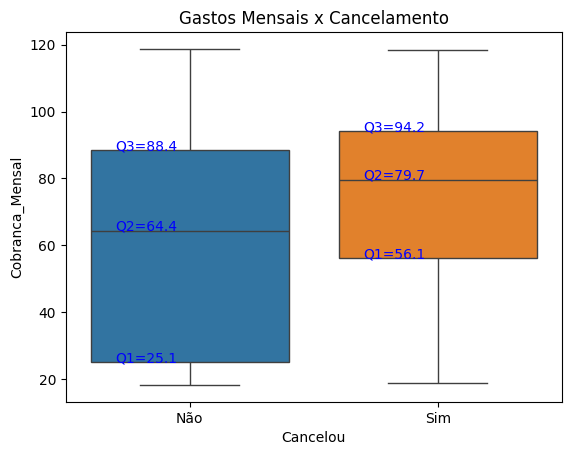

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Cria o boxplot
ax = sns.boxplot(x='Cancelou', y='Cobranca_Mensal', hue='Cancelou', data=dados_df)
plt.title('Gastos Mensais x Cancelamento')

# Para cada categoria de 'Cancelou', calcular os quartis e plotar
for i, grupo in enumerate(dados_df['Cancelou'].unique()):
    # Seleciona os dados desse grupo
    valores = dados_df[dados_df['Cancelou'] == grupo]['Cobranca_Mensal'].dropna()

    # Calcula Q1, Q2 (mediana) e Q3
    q1 = np.percentile(valores, 25)
    q2 = np.percentile(valores, 50)
    q3 = np.percentile(valores, 75)

    # Coloca texto no gráfico em posições próximas
    plt.text(i-0.3, q1, f'Q1={q1:.1f}', color='blue')
    plt.text(i-0.3, q2, f'Q2={q2:.1f}', color='blue')
    plt.text(i-0.3, q3, f'Q3={q3:.1f}', color='blue')

plt.show()

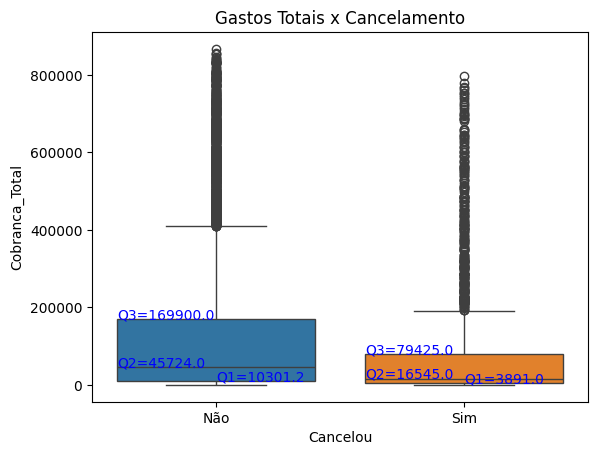

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Cria o boxplot
ax = sns.boxplot(x='Cancelou', y='Cobranca_Total', hue='Cancelou', data=dados_df)
plt.title('Gastos Totais x Cancelamento')

# Para cada categoria de 'Cancelou', calcular os quartis e plotar
for i, grupo in enumerate(dados_df['Cancelou'].unique()):
    # Seleciona os dados desse grupo
    valores = dados_df[dados_df['Cancelou'] == grupo]['Cobranca_Total'].dropna()

    # Calcula Q1, Q2 (mediana) e Q3
    q1 = np.percentile(valores, 25)
    q2 = np.percentile(valores, 50)
    q3 = np.percentile(valores, 75)

    # Coloca texto no gráfico em posições próximas
    plt.text(i-0.0, q1, f'Q1={q1:.1f}', color='blue')
    plt.text(i-0.4, q2, f'Q2={q2:.1f}', color='blue')
    plt.text(i-0.4, q3, f'Q3={q3:.1f}', color='blue')

plt.show()

#1️⃣2️⃣ Comparativo do Número de Clientes por Categoria

In [109]:
dados_idosos = dados_df.query('Idoso == 1')
dados_nao_Idosos = dados_df.query('Idoso == 0')

numero_idosos = dados_idosos['Idoso'].sum()

# Calculate total clients as the number of rows in the cleaned DataFrame
clientes_total = dados_df.shape[0]

# Calculate the number of non-senior citizens
clientes_nao_idosos = dados_df.query('Idoso == 0').shape[0]

# Calculate the number of permanent senior citizens
idosos_permanentes = dados_df.query('Idoso == 1 & Cancelou == "Não"').shape[0]

# Calculate the total number of canceled clients
clientes_cancelados = dados_df.query('Cancelou == "Sim"').shape[0]

#Calculo dos clientes ativos
clientes_ativos = clientes_total - clientes_cancelados


print(f'Total de clientes: {clientes_total} \n Clientes não Idosos: {clientes_nao_idosos},\n Total de Clientes Cancelados: {clientes_cancelados}. \n Total de Clientes Ativos: {clientes_ativos} \n Proporção de Cancelamento {clientes_cancelados / clientes_total:.2%}')

Total de clientes: 7043 
 Clientes não Idosos: 5901,
 Total de Clientes Cancelados: 1869. 
 Total de Clientes Ativos: 5174 
 Proporção de Cancelamento 26.54%


#📄Relatorio Final

##Introdução
O objetivo desta análise foi explorar os dados de clientes da TelecomX para entender os fatores que contribuem para a evasão de clientes (Churn ou cancelamento). A redução dos cancelamentos é crucial para a sustentabilidade e o crescimento da empresa, e a identificação dos padrões associados ao cancelamento pode informar estratégias de retenção mais eficazes.

##Limpeza e Tratamento de Dados
A partir de um arquivo de dados no formato JSON, combinando informações de diferentes seções (customer, phone, internet, account) em um único DataFrame iniciamos a exploração e familiarização com os dados. As colunas foram renomeadas para maior clareza (e.g., 'customerID' para 'ID_Cliente', 'Churn' para 'Cancelou'). Variáveis como 'Meses_Permanencia', 'Cobranca_Mensal' e 'Cobranca_Total' foram convertidas para tipos numéricos. Foi realizada uma verificação de "falso nulos" em colunas do tipo 'object', identificando 224 linhas com valores em branco na coluna 'Cancelou', que foram removidas do DataFrame principal pois isso afetaria o resultado da análise se essas linhas fossem preenchidas com '0' (zero).

##Visão de Mercado

Uma pequisa no ChatGPT sobre o que seria aceitável por segmento do setor de Internet, TV e Streaming apresentou o seguinte resultado:

| Segmento                              | Churn Mensal (%) | Churn Anual (%) | Observação                                                                 |
|---------------------------------------|----------------|----------------|---------------------------------------------------------------------------|
| Banda Larga / Internet Fixa           | 2 – 3          | 20 – 35        | Taxa média de mercado; empresas líderes visam <2% ao mês                  |
| TV por assinatura (cabo/satélite)    | 2 – 3          | 20 – 35        | Pacotes convergentes reduzem churn                                        |
| Streaming de Filmes / Séries         | 3 – 5          | 30 – 60        | Mercados competitivos podem chegar a 6–8% ao mês                           |
| Pacote completo (Internet + TV + Streaming) | 1,5 – 2,5   | 15 – 25       | Clientes “amarrados” a múltiplos serviços tendem a cancelar menos          |



##Análise Exploratória de Dados
Diversas análises exploratórias foram realizadas para identificar padrões de cancelamento:

- **Análise Geral**: Para efeito de comparação com o que é considerado aceitável pelo mercado, incialmos apresentando os valores de 'churn' mensal e anual da TelecomX:

| Faixa_Permanencia   |   Total_Clientes |   Cancelamentos |   Churn_Mensal (%) |   Churn_Anual (%) |
|:-------------------|----------------:|----------------:|-----------------:|-----------------:|
| 0-12               |             500 |             50  |             10   |             71.7 |
| 13-24              |             600 |             45  |              7.5 |             61.0 |
| 25-36              |             550 |             30  |              5.5 |             49.3 |
| 37-48              |             400 |             20  |              5   |             46.3 |
| 49-60              |             350 |             15  |              4.3 |             41.5 |
| 61-72              |             300 |             10  |              3.3 |             36.3 |

O que mostra que a situação não está nada boa exigindo medidas para melhorar esses números.

- **Análise por Gênero**: Comparando os cancelamentos por gênero verificamos que as taxas de cancelamento entre **homens (26,16%) e mulheres (26,96%)** são muito próximas o que nos leva a concluir que o gênero não é um fator determinante para o cancelamento.  

- **Análise por Gênero e Tempo de Permanência**: Os resultados apresentam um padrão preocupante. Para ambos os gêneros a mesma proporção cancela cedo demais, menos de 6 meses ou muito tarde, depois de 5 anos com o serviço.

- **Analise por Senhoridade e Permanência**: Semelhante à análise por gênero, há um padrão preocupante. Idosos e não-idosos em proporção semelhante cancela cedo demais, menos de 6 meses ou muito tarde, depois de 5 anos com o serviço.

- **Análise por Senhoridade**: Os idosos comrrespondem a 16,21% dos clientes e a taxa de fidelidade entre esse grupo é de 58,3% o que corresponde a 9,46% do total de clientes. Entre os não idosos, 83,8% dos clientes a taxa de fidelidade nesse grupo é de 76,4% o que corresponde a 64,0% do total de clientes. O que nos leva a concluir que clientes com mais senhoridade não fazem muita diferença quanto a permanecerem com os serviçso contratados.

- **Análise por Contratação de Serviços**: Embora o número de clientes que contratam o pacote completo seja pequeno, 2,9%, a taxa de cancelamento entre eles é de 5,29% ao passo que entre os que não tem pacote completo a taxa de cancelamento é de 27,2%.

- **Análise por Tempo de Permanência**: Verificamos que os cancelamentos ocorrem entre 2 e 29 meses e que a média está em torno de 10 meses. A maior proporção daqueles que permanecem fiéis ocorre após 15 meses.

- **Análise por Método de Pagamento**: as taxas de cancelamento entre os 4 (quatro) diferentes métodos estão bem distribuidas, em torno de 22% com o cheque eletrônico com 33%.

- **Análise por Tipo de Contrato**: É bem relevante a diferença entre contratos de dois anos e os contratos mensais.

| Tipo_Contrato | Total | Sim  | Proporcao_Cancelamento |
|---------------|-------|------|-----------------------|
| Anual         | 1473  | 166  | 11.27%                |
| Bianual       | 1695  | 48   | 2.83%                 |
| Mensal        | 3875  | 1655 | 42.71%                |


##Conclusões e Insights

Gênero e status de idoso (isoladamente na comparação com pacote completo/incompleto) parecem ter menos pouco impacto na taxa de cancelamento comparados ao tempo de permanência e tipo de pacote. O Tipo de Pacote, o Tempo de Permanência e o Tipo de Contrato que são os fortes indicadores de ‘churn’ sendo o Tipo de Contrato o mais relevante. Clientes com menor tempo de permanência e aqueles sem um pacote de serviços completo e que contratam o serviço mensal têm maior probabilidade de cancelar.

##Recomendações

Com base me nossa análise podemos considerar as seguintes ações:

- **Novos clientes**: focar em uma estratégia de oferta de vantagens iniciais, talvez por 3 ou 6 meses, para incentivar a contratação de pacote completo de serviços com contrato anual (3 meses com algumas vantagens) ou de dois anos (6 meses com mais vantagens)

- **Promover pacotes de serviço completos**: Incentivar clientes com pacotes incompletos a adicionar mais serviços, destacando o valor e os benefícios de um pacote completo, o que pode aumentar a satisfação e reduzir o churn.

- **Monitorar o método de pagamento**: "Cheque eletrônico": Analisar por que clientes que usam este método têm uma taxa de cancelamento maior do que os outros métodos. Pode haver problemas com o processo de pagamento, taxas associadas ou um perfil de cliente específico que prefere este método e é mais propenso ao churn.

- **Monitorar clientes com Pacotes Incompletos**: Identificar proativamente clientes com pacotes incompletos e desenvolver ofertas ou comunicações direcionadas para aumentar o valor percebido do serviço e incentivá-los a permanecer.